Données brutes :
                                           Book Name         Author Name  \
0  Maths Concept King All Formulas and Theorum | ...    Gagan Pratap Sir   
1  BlackBook of English Vocabulary May 2024 by Ni...        Nikhil Gupta   
2  Atomic Habits : the life-changing million-copy...         James Clear   
3  My First Library: Boxset of 10 Board Books for...  Wonder House Books   
4  Lucent General Knowledge - New Reduced Price E...         Binay Karna   

   Rating    Price  
0     4.7  ₹239.00  
1     4.5  ₹299.00  
2     4.6  ₹476.00  
3     4.5  ₹399.00  
4     4.4  ₹209.00  

Valeurs manquantes avant traitement :
Book Name      0
Author Name    0
Rating         0
Price          0
dtype: int64

Valeurs manquantes après traitement :
Book Name      0
Author Name    0
Rating         0
Price          0
dtype: int64

Données après prétraitement :
                                           Book Name    Rating     Price  \
0  Maths Concept King All Formulas and Theorum | ... 

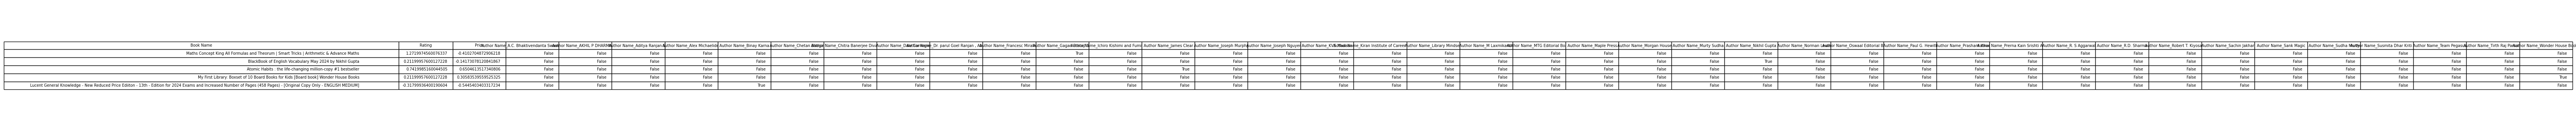

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

# Ignorer les avertissements de type FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Charger les données brutes
file_path = '../data_raw/BestSeller_Books_of_Amazon.csv'
df = pd.read_csv(file_path)

# Afficher les données brutes
print("Données brutes :")
print(df.head())

# Vérifier les valeurs manquantes
print("\nValeurs manquantes avant traitement :")
print(df.isnull().sum())

# Traitement des valeurs manquantes 
df.dropna(inplace=True)

# Vérifier les valeurs manquantes après traitement
print("\nValeurs manquantes après traitement :")
print(df.isnull().sum())

# Nettoyage des données : conversion des prix en numérique
df['Price'] = df['Price'].replace('[\₹,]', '', regex=True).astype(float)

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=['Author Name'])

# Normalisation des données numériques
scaler = StandardScaler()
df[['Price', 'Rating']] = scaler.fit_transform(df[['Price', 'Rating']])

# Sauvegarder les données traitées
df.to_csv('../data_processed/processed_data.csv', index=False)

# Afficher les données après prétraitement
print("\nDonnées après prétraitement :")
print(df.head())

# Sauvegarder l'affichage des données après prétraitement
fig, ax = plt.subplots(figsize=(60, 4))  # Taille de la figure ajustée
table = ax.table(cellText=df.head().values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(7)
table.scale(1.2, 1.2)  # Ajuster l'échelle du tableau

# Ajuster la largeur des colonnes
table.auto_set_column_width([0, 1])  # Ajuster la largeur des colonnes 'Book Name' et 'Author Name'

ax.axis('off')

# Ajuster les marges pour centrer le tableau
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('../reports/figures/Donnees_apres_pretraitement.png', bbox_inches='tight')
plt.show()
